# Delicious Asian and Indian Cuisines 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

df  = pd.read_csv('../data/cuisines.csv')
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


<Axes: xlabel='cuisine'>

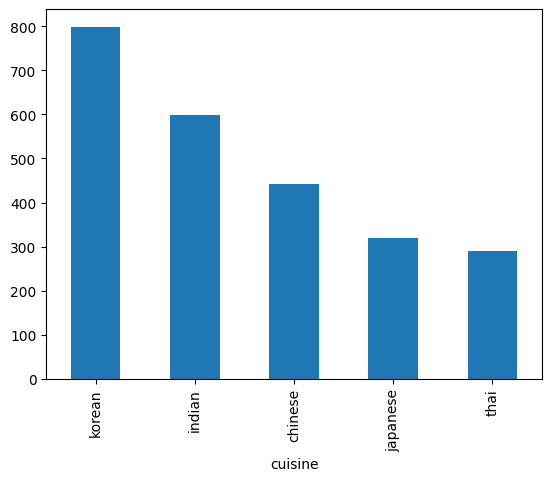

In [10]:
df.cuisine.value_counts().plot.bar()

In [26]:
# sort ingredients by amount
# df.T is transposed DataFrame
ingredients = df.T.drop(["cuisine", "Unnamed: 0"]).sum(axis=1).to_frame("value")
ingredients = ingredients[(ingredients.value > 0) & ingredients.value.notna()]
#ingredients = ingredients[(ingredients.T != 0).any()]
ingredients = ingredients.sort_values(by="value", ascending=False, inplace=False)
ingredients

,value
garlic,1226
soy_sauce,979
cayenne,975
ginger,907
scallion,844
...,...
chayote,1
champagne_wine,1
catfish,1
brussels_sprout,1


<Axes: >

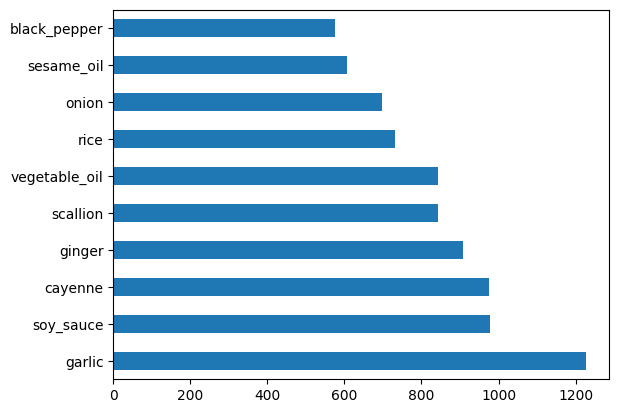

In [23]:
ingredients.head(10).value.plot.barh()

In [65]:
columns = [*ingredients.T.columns]

# remove ingredients that are used everywhere and almost all dishes
feature_df= df.loc[:, columns].drop(['rice','garlic','ginger'], axis=1)
labels_df = df.cuisine

In [86]:
feature_df.groupby(df.cuisine).sum().loc[:, ['sake', 'cumin', 'soy_sauce', 'olive_oil', 'potato', 'mandarin_peel']]

,sake,cumin,soy_sauce,olive_oil,potato,mandarin_peel
cuisine,,,,,,
chinese,39,4,303,10,5,0
indian,0,361,7,90,67,0
japanese,89,6,182,15,9,6
korean,130,3,394,3,37,0
thai,2,88,93,23,1,0


In [45]:
# we should remove the most common ingredients
from sklearn.preprocessing import LabelEncoder

labels_encoder = LabelEncoder()
converted_cuisines = labels_encoder.fit_transform(clear_df.cuisine)

updated_df = clear_df.drop(["cuisine"], axis=1).assign(cuisine=converted_cuisines)

corr_matrix = updated_df.corr().abs()

# we can see that salmon doesn't affect picking cuisine
corr_matrix.cuisine.sort_values()

# This matrix shows me a linear correlation betwween two features
# to remove some feature better to use `Feature Importance from Tree-based Models` or `Recursive Feature Elimination`


salmon                 0.000092
barley                 0.000364
pecan                  0.000653
veal                   0.000653
litchi                 0.000653
                         ...   
starch                 0.239832
roasted_sesame_seed    0.244945
lemongrass             0.268590
fish                   0.369956
cuisine                1.000000
Name: cuisine, Length: 285, dtype: float64

In [71]:
# balance dataset
# there are multiple algorithms to add points to the categiories that has smaller amount of data
# SMOTE (has a couple of types) and ADASYN based on creating approximated points between points of the same class by finding k-neighbours and drawing the line between them
# RandomOverSampler just adds points of with the same values or with small differences
oversample = SMOTE()

transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

print(labels_df.value_counts())
print(transformed_label_df.value_counts())

cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64
cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64


In [82]:
merged_df = pd.merge(feature_df, transformed_feature_df, how='outer', indicator=True)

unique_to_original = merged_df[merged_df['_merge'] == 'left_only']
unique_to_oversampled = merged_df[merged_df['_merge'] == 'right_only']

# should be empty because all original data is in the oversampled DataFrame
print(unique_to_original)

# new approximated data
unique_to_oversampled.head()

Empty DataFrame
Columns: [soy_sauce, cayenne, scallion, vegetable_oil, onion, sesame_oil, black_pepper, vinegar, cumin, fish, egg, coriander, pepper, soybean, turmeric, chicken, wheat, cilantro, vegetable, carrot, beef, shrimp, bell_pepper, tomato, sake, starch, roasted_sesame_seed, fenugreek, coconut, butter, cucumber, pork, shiitake, chicken_broth, radish, wine, lime_juice, yogurt, mushroom, sesame_seed, olive_oil, lemon_juice, cinnamon, cane_molasses, bean, potato, nut, pea, mustard, cabbage, milk, seaweed, honey, mint, oyster, corn, lime, kelp, cardamom, cream, shallot, chinese_cabbage, peanut_oil, peanut, lemongrass, beef_broth, squid, pumpkin, lettuce, clam, mango, seed, sherry, basil, lemon, bread, tamarind, celery, pear, white_wine, enokidake, parsley, raisin, almond, meat, bay, peanut_butter, barley, thai_pepper, celery_oil, roasted_peanut, crab, yeast, wasabi, cashew, apple, broccoli, nira, lentil, katsuobushi, ...]
Index: []

[0 rows x 282 columns]


,soy_sauce,cayenne,scallion,vegetable_oil,onion,sesame_oil,black_pepper,vinegar,cumin,fish,...,raw_beef,red_algae,chervil,sauerkraut,chayote,champagne_wine,catfish,brussels_sprout,liver,_merge
4632,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,right_only
4633,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,right_only
4634,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,right_only
4635,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,right_only
4636,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,right_only


In [83]:
transformed_df = pd.concat([transformed_label_df, transformed_feature_df], axis=1, join='outer')
transformed_df.to_csv("../data/cleaned_cuisines.csv")